# Training

In [1]:
%%capture
%pip install -r requirements.txt

In [2]:
import numpy as np
import tensorflow as tf;
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from entanglement_witnesses import witnesses
import mlflow

2024-05-22 18:37:05.252330: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-22 18:37:05.279574: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-05-22 18:37:05.706026: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Parameters cells
WITNESS_NAME = "CHSH"

In [4]:
# Parameters
WITNESS_NAME = "NEGATIVITY"


In [5]:
mlflow.set_tracking_uri(
    "http://localhost:5000"
)

In [6]:
def get_model(name, data_file_path):

    data = np.load(data_file_path)
    simulated_states = data["states"]
    simulated_labels = data["labels"]

    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(simulated_states.shape[1],)),  # Adjust input shape based on your data
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    X_train, X_val, y_train, y_val = train_test_split(simulated_states, simulated_labels, test_size=0.2, random_state=42)
    history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

    # Start an MLflow run and log the model
    with mlflow.start_run() as run:
        # Log the model
        mlflow.tensorflow.log_model(model, "model")

        # Log parameters
        mlflow.log_param("witness", name)

        # Evaluate the model and log metrics
        loss, accuracy = model.evaluate(X_val, y_val)
        mlflow.log_metric("loss", loss)
        mlflow.log_metric("accuracy", accuracy)
        
        # Register the model
        model_name = "QuantumStateClassifier-" + name
        model_uri = f"runs:/{run.info.run_id}/model"
        mlflow.register_model(model_uri, model_name)
        print(f"Model saved in run {run.info.run_id}")

    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model {} Accuracy'.format(name))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
    
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model {} Loss'.format(name))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    return model

Epoch 1/20


/home/faical/anaconda3/envs/quantum-entanglement/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-22 18:37:06.681509: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-22 18:37:06.703611: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentati

I0000 00:00:1716395827.307400  240315 service.cc:145] XLA service 0x7d0b6000afa0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1716395827.307424  240315 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 6GB Laptop GPU, Compute Capability 8.6
2024-05-22 18:37:07.319708: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-22 18:37:07.390893: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


  1/150 ━━━━━━━━━━━━━━━━━━━━ 2:51 1s/step - accuracy: 0.6875 - loss: 0.6794

110/150 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.6800 - loss: 0.6191

I0000 00:00:1716395827.988491  240315 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6886 - loss: 0.6032 - val_accuracy: 0.8767 - val_loss: 0.3579


Epoch 2/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8438 - loss: 0.3742

126/150 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - accuracy: 0.9047 - loss: 0.2865

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.9089 - loss: 0.2758 - val_accuracy: 0.9600 - val_loss: 0.1226


Epoch 3/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0940

134/150 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.9685 - loss: 0.1047

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.9686 - loss: 0.1039 - val_accuracy: 0.9733 - val_loss: 0.0720


Epoch 4/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0490

124/150 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.9797 - loss: 0.0684

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.9799 - loss: 0.0679 - val_accuracy: 0.9842 - val_loss: 0.0483


Epoch 5/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0251

117/150 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.9851 - loss: 0.0537

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.9854 - loss: 0.0521 - val_accuracy: 0.9908 - val_loss: 0.0379


Epoch 6/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0193

120/150 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.9920 - loss: 0.0392

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.9916 - loss: 0.0389 - val_accuracy: 0.9908 - val_loss: 0.0293


Epoch 7/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0087

105/150 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.9893 - loss: 0.0317

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.9899 - loss: 0.0310 - val_accuracy: 0.9900 - val_loss: 0.0238


Epoch 8/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0139

141/150 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - accuracy: 0.9930 - loss: 0.0259

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.9930 - loss: 0.0259 - val_accuracy: 0.9917 - val_loss: 0.0189


Epoch 9/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0286

113/150 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.9950 - loss: 0.0200

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.9948 - loss: 0.0202 - val_accuracy: 0.9925 - val_loss: 0.0165


Epoch 10/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9375 - loss: 0.1144

149/150 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - accuracy: 0.9919 - loss: 0.0225

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.9919 - loss: 0.0225 - val_accuracy: 0.9950 - val_loss: 0.0148


Epoch 11/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0067

141/150 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - accuracy: 0.9960 - loss: 0.0149

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.9959 - loss: 0.0150 - val_accuracy: 0.9933 - val_loss: 0.0138


Epoch 12/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0058

130/150 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.9960 - loss: 0.0127

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.9960 - loss: 0.0130 - val_accuracy: 0.9958 - val_loss: 0.0120


Epoch 13/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0031

125/150 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.9959 - loss: 0.0114

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.9960 - loss: 0.0115 - val_accuracy: 0.9950 - val_loss: 0.0113


Epoch 14/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0028

132/150 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.9970 - loss: 0.0083

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.9969 - loss: 0.0086 - val_accuracy: 0.9992 - val_loss: 0.0094


Epoch 15/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0108

118/150 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.9976 - loss: 0.0098

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.9976 - loss: 0.0097 - val_accuracy: 0.9992 - val_loss: 0.0070


Epoch 16/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0032

119/150 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.9966 - loss: 0.0086

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.9967 - loss: 0.0087 - val_accuracy: 0.9992 - val_loss: 0.0063


Epoch 17/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0238

135/150 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.9975 - loss: 0.0089

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.9976 - loss: 0.0088 - val_accuracy: 0.9975 - val_loss: 0.0063


Epoch 18/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0114

123/150 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.9986 - loss: 0.0063

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.9985 - loss: 0.0063 - val_accuracy: 0.9983 - val_loss: 0.0053


Epoch 19/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0033

123/150 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.9982 - loss: 0.0064

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.9983 - loss: 0.0062 - val_accuracy: 0.9983 - val_loss: 0.0052


Epoch 20/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 3.3108e-04

132/150 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.9992 - loss: 0.0032   

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.9991 - loss: 0.0034 - val_accuracy: 0.9992 - val_loss: 0.0043


2024/05/22 18:37:10 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


 1/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 9.0679e-04

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.9993 - loss: 0.0053   


/home/faical/anaconda3/envs/quantum-entanglement/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Registered model 'QuantumStateClassifier-NEGATIVITY' already exists. Creating a new version of this model...
2024/05/22 18:37:12 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-NEGATIVITY, version 6


Model saved in run ca61d6cda42040518381aefa9a58953a


Created version '6' of model 'QuantumStateClassifier-NEGATIVITY'.


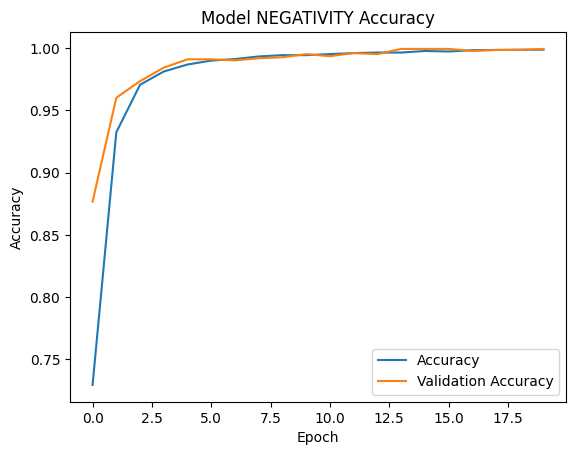

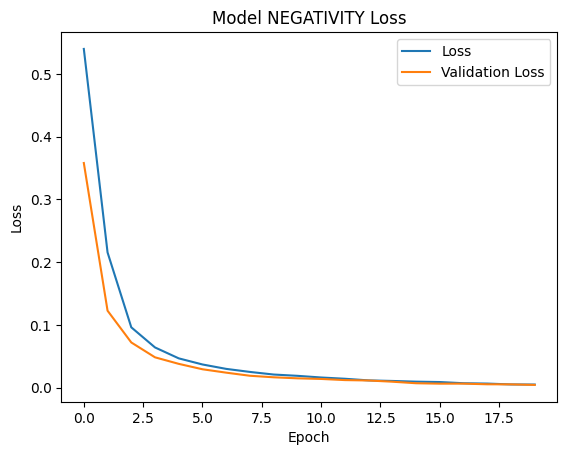

In [7]:
models = {}
parameter_witness = {WITNESS_NAME: witnesses[WITNESS_NAME]}

mlflow.set_experiment('ML Quantum entanglement')

for name, witness in parameter_witness.items():
    data_file_path = "./simulated_data/simulation-{}.npz".format(name)
    model = get_model(name, data_file_path)
    models[name] = {"model": model, "witness": witness}
